## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("kc_house_data.csv")

In [4]:
# df.head()

In [5]:
# df[['yr_renovated']].head()

In [6]:
# df.info()

In [7]:
# df.T

In [8]:
#cleaning up sqft_basement data
clean = df.replace("?", np.nan)

In [9]:
clean['sqft_basement'] = clean['sqft_basement'].replace('?',np.nan).astype(float)

In [10]:
# type changes of two columns
clean["sqft_basement"].astype(float)
clean["date"] = pd.to_datetime(clean["date"])

In [11]:
# clean.info()

In [12]:
#exploring missing values
# clean.isna().sum()

In [13]:
# clean.isnull().sum()

In [14]:
#exploring missing values of 'view'
condition_view=clean['view']!=np.nan
clean.loc[condition_view,'view'].describe()   

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

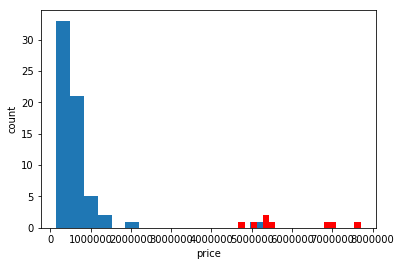

In [15]:
dataframe=clean.loc[clean['view'].isnull()==True]
plt.hist(dataframe['price'],bins=15)
plt.hist(clean.loc[clean['price']>4500000]['price'],bins=20,color='red')
plt.xlabel
plt.xlabel('price')
plt.ylabel('count')
plt.show()    #this is the reason why the points were not dropped as the price for the missing 'view' values
#were concentrated in the extreme ends and we wanted to make sure the points were included in our regression model.
# We see that one of the null view homes is one of very few high-value homes, making it useful in predicting the
# values on this end of the spectrum



In [16]:
# clean.columns

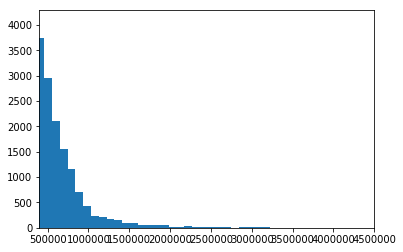

In [17]:
df_sqftbasement=clean.loc[clean['sqft_basement'].isna()==False]

plt.hist(df_sqftbasement['price'],bins=80)
plt.xlim(400000,4500000)

plt.show()

In [18]:
df_sqftbasement['sqft_basement'].describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Since the null sqft_basement transactions are concentrated in the low end of our price (target value), we chose to retain these records and impute the median of 0.

In [19]:
clean['sqft_basement']=clean['sqft_basement'].replace(np.nan,0)

In [20]:
clean['sqft_basement'].describe() #compare this with when replace with mean

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [21]:
#cleaning yr_innovated
# clean.head()

In [22]:
dataframe_yr=clean.loc[clean['yr_renovated'].isnull()].copy()

dataframe_yr.loc[dataframe_yr['yr_renovated'].isna(),'yr_renovated']=(
    dataframe_yr.loc[dataframe_yr['yr_renovated'].isnull(),'yr_built'])
dataframe_yr.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933,98028,47.7379,-122.233,2720,8062
12,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,7,1430,0.0,1927,1927,98028,47.7558,-122.229,1780,12697
23,8091400200,2014-05-16,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0.0,1985,1985,98030,47.3533,-122.166,1220,8386
26,1794500383,2014-06-26,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,1915,98119,47.6386,-122.360,1760,3573
28,5101402488,2014-06-24,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,...,7,790,730.0,1948,1948,98115,47.6950,-122.304,1520,6235


In [23]:
clean.loc[clean['yr_renovated'].isna(),'yr_renovated']=(
    clean.loc[clean['yr_renovated'].isnull(),'yr_built'])

clean.loc[clean['yr_renovated']==0,'yr_renovated']=(
    clean.loc[clean['yr_renovated']==0,'yr_built'])
clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


In [24]:
clean['view_clean']=clean['view']
clean.loc[clean['view_clean'].isna(),'view_clean']=0
print(clean['view_clean'].isna().sum(),clean['view'].isna().sum())

0 63


In [25]:
clean['waterfront_clean']=clean['waterfront']
clean.loc[clean['waterfront_clean'].isna(),'waterfront_clean']=0
# clean.describe().T

In [26]:
# clean.columns

In [27]:
# def replace_yr_ren(yr_ren,yr_built):
#     """takes two lists and if yr_ren is np.nan, it returns yr_built"""
#     output=[]
#     for index,year in enumerate(yr_ren):
#         if year.isnull() or year==0:
#             output.append(yr_built[index])
#         else:
#             output.append(year)
#     return output

In [28]:
# clean[['yr_renovated','yr_built']].head()


In [29]:
# np.array(replace_yr_ren(clean['yr_renovated'],clean['yr_built'])).value_counts()

In [30]:
# clean['yr_rennovated_clean'] = replace_yr_ren(clean['yr_renovated'],clean['yr_built'])
# clean.head()

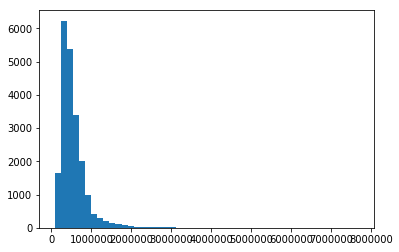

In [31]:
#graph for the price for the missing 'sqft_basement' values
plt.hist(df_sqftbasement['price'],bins=50)
plt.show()
#the graph shows us the missing sqft_basement are concentrated in low priced homes

In [32]:
#we could replace the np.nan values of 'view' with 0 but we would like to take a look..
#how the values of price change for the missing values of view


In [33]:
#creating a flag column for waterfront, first approach
clean["imputed_waterfront"] = clean["waterfront"].replace(np.nan, 0)

#creating a flag column for waterfront, second approach, needs error resolution
#clean["imputed_waterfront_2"] = clean.loc[clean["waterfront"] == np.nan]

#imputing waterfront records to median value, which is zero
clean["waterfront"].replace(np.nan, 0, inplace = True)

In [34]:
#check if a new column with a headline 'imputed_waterfront' is created
clean.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_clean',
       'waterfront_clean', 'imputed_waterfront'],
      dtype='object')

In [35]:
#To view the two columns 'waterfront'
clean[['waterfront']].isna().sum()

waterfront    0
dtype: int64

In [36]:
clean['sqft_basement'].isna().sum()

0

In [37]:
clean.isna().sum()

id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                  63
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
view_clean             0
waterfront_clean       0
imputed_waterfront     0
dtype: int64

In [38]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id                    21597 non-null int64
date                  21597 non-null datetime64[ns]
price                 21597 non-null float64
bedrooms              21597 non-null int64
bathrooms             21597 non-null float64
sqft_living           21597 non-null int64
sqft_lot              21597 non-null int64
floors                21597 non-null float64
waterfront            21597 non-null float64
view                  21534 non-null float64
condition             21597 non-null int64
grade                 21597 non-null int64
sqft_above            21597 non-null int64
sqft_basement         21597 non-null float64
yr_built              21597 non-null int64
yr_renovated          21597 non-null float64
zipcode               21597 non-null int64
lat                   21597 non-null float64
long                  21597 non-null float64
sqft_living15         21597 non-null int64
sqft

In [39]:
clean.to_csv('cleaneddata.csv')

In [40]:
import folium
import webbrowser

In [41]:
clean.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_clean',
       'waterfront_clean', 'imputed_waterfront'],
      dtype='object')

In [43]:
# housing_map=folium.Map(location=[df['lat'],df['long']],zoom_starts=5)

In [44]:
clean_ohe=pd.read_csv('clean_ohe.csv')

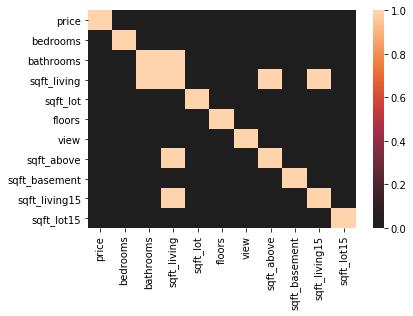

In [45]:
clean_model_one=clean.drop(['id','lat','long','waterfront','yr_built','yr_renovated',
                            'grade','condition','zipcode','view_clean','waterfront_clean','imputed_waterfront']
                           ,axis=1)
import seaborn as sns
sns.heatmap(abs(clean_model_one.corr())>0.75,center=0);

In [46]:
clean_model_one.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.395734,0.605368,0.321108,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.078523,0.479386,0.297229,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.186451,0.686668,0.278485,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.282532,0.876448,0.428660,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075298,0.184139,0.015031,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028436,0.523989,-0.241866,0.280102,-0.010722
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,1.000000,0.166299,0.271689,0.279561,0.073332
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.166299,1.000000,-0.051175,0.731767,0.195077
sqft_basement,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,0.271689,-0.051175,1.000000,0.199288,0.015885
sqft_living15,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.279561,0.731767,0.199288,1.000000,0.183515


In [ ]:
##'bathrooms' and 'sqft_living' are highly correlated. 
#'sqft_above' and 'sqft_living' are highly correlated
#'sqft_living' and 'sqft_living15' are highly correlated. 
#price and sqft_living have higher linear associate than the other three features so we could drop those two
#To avoidmulticollinarity

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
#'clean data with no categorical features'

outcome='price'
x_cols=['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement',
        'sqft_living15','sqft_lot15']
predictors='+'.join(x_cols)
formula=outcome + "~" + predictors
model=ols(formula=formula,data=clean_model_one).fit()
model.summary()

In [ ]:
#'clean data with no categorical features after taking out:
#'bathrooms','sqft_living','sqft_lot','sqft_above','sqft_living15'
outcome='price'
x_cols=['bedrooms','sqft_living','sqft_lot','sqft_basement','sqft_lot15']

predictors='+'.join(x_cols)
formula=outcome + "~" + predictors
model=ols(formula=formula,data=clean_model_one).fit()
model.summary()

In [ ]:
#model with ALL categorical features except Zipcode
outcome='price'
x_cols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above',
        'sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','waterfront_clean','view_clean']
predictors='+'.join(x_cols)
formula=outcome + "~" + predictors
model=ols(formula=formula,data=clean_ohe).fit()
model.summary()

In [ ]:
#took out 'sqft_above' feature
outcome='price'
x_cols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade',
        'sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','waterfront_clean','view_clean']
predictors='+'.join(x_cols)
formula=outcome + "~" + predictors
model=ols(formula=formula,data=clean_ohe).fit()
model.summary()

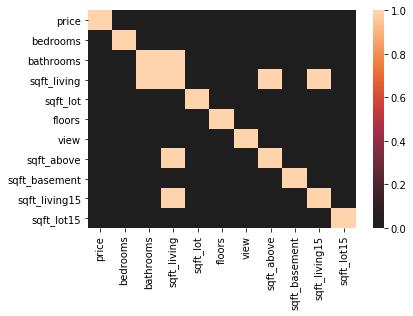

In [47]:
clean_model_one=clean.drop(['id','lat','long','waterfront','yr_built','yr_renovated',
                            'grade','condition','zipcode','view_clean','waterfront_clean','imputed_waterfront']
                           ,axis=1)
import seaborn as sns
sns.heatmap(abs(clean_model_one.corr())>0.75,center=0);

In [86]:
# x_cols=[col for col in clean_ohe.columns if col!='sqft_above']

In [95]:

x_condition=[col for col in clean_ohe.columns if col not in ['sqft_above','id','date','price']]
# x_condition 
x_value=pd.DataFrame(clean_ohe,columns=x_condition)
X=x_value.values 
y=clean_ohe.iloc[:,2].values.reshape(-1,1)

In [80]:
from sklearn.preprocessing import StandardScaler
import numpy as np


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [110]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [99]:
from sklearn.linear_model import LinearRegression

In [101]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
y_pred=lr.predict(X_test)

In [108]:
import statsmodels.api as sm

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:29:19   Log-Likelihood:            -2.8961e+05
No. Observations:               21597   AIC:                         5.794e+05
Df Residuals:                   21511   BIC:                         5.801e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.41e+07   6.09e+06     -3.954      0.0

In [ ]:
# x_cols=[col for col in clean_ohe.columns if col!='sqft_above']
# clean_ohe[x_cols[1:13]].hist(figsize  = [12, 12]);

# x_cols[1:13]


In [ ]:
# outcome='price'
# x_cols=[col for col in clean_ohe.columns if col!='sqft_above']
# predictors='+'.join(x_cols)
# formula=outcome + "~" + predictors
# model=ols(formula=formula,data=clean_ohe).fit()
# # model.summary()

In [131]:

x_condition=[col for col in clean_ohe.columns if col not in ['sqft_above','id','date','price']]
# x_condition 
x_value=pd.DataFrame(clean_ohe,columns=x_condition)
X=x_value.values 
y=clean_ohe.iloc[:,2].values.reshape(-1,1)
test_size=[0.05,0.1,0.15,0.2,0.25]

for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    

    model = sm.OLS(y_train, X_train).fit()
    predictions = model.predict(X_test) 
    print_model = model.summary()
    print(i,print_model)
    

0.05                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     82.31
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:55:32   Log-Likelihood:            -3.0080e+05
No. Observations:               20517   AIC:                         6.018e+05
Df Residuals:                   20432   BIC:                         6.025e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -2.53e+04   5127.913     -4.934    

0.1                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     78.68
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:55:33   Log-Likelihood:            -2.8502e+05
No. Observations:               19437   AIC:                         5.702e+05
Df Residuals:                   19352   BIC:                         5.709e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.523e+04   5276.172     -4.783     

0.15                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     75.36
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:55:33   Log-Likelihood:            -2.6923e+05
No. Observations:               18357   AIC:                         5.386e+05
Df Residuals:                   18272   BIC:                         5.393e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -2.59e+04   5443.589     -4.758    

0.2                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     70.55
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:55:33   Log-Likelihood:            -2.5339e+05
No. Observations:               17277   AIC:                         5.070e+05
Df Residuals:                   17192   BIC:                         5.076e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -2.52e+04   5599.380     -4.501     

0.25                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     66.15
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:55:34   Log-Likelihood:            -2.3758e+05
No. Observations:               16197   AIC:                         4.753e+05
Df Residuals:                   16112   BIC:                         4.760e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.628e+04   5785.389     -4.542    

Text(0, 0.5, 'price')

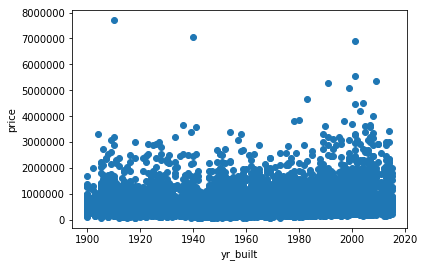

In [141]:
plt.scatter(clean_ohe['yr_built'],clean_ohe['price'])
plt.xlabel('yr_built')
plt.ylabel('price')

In [132]:
clean_ohe[['waterfront_clean','price']].corr()

,waterfront_clean,price
waterfront_clean,1.000000,0.264306
price,0.264306,1.000000


In [138]:
import math

clean_ohe['price_log']=np.log(clean_ohe['price'])

In [140]:
clean_ohe[['waterfront_clean','price_log']].corr()

,waterfront_clean,price_log
waterfront_clean,1.00000,0.17072
price_log,0.17072,1.00000


In [142]:
clean_ohe[['yr_built']].head()

,yr_built
0,1955
1,1951
2,1933
3,1965
4,1987


In [144]:
clean_ohe['age_house']=2019-clean_ohe['yr_built']

In [146]:
clean_ohe[['age_house']].head()

,age_house
0,64
1,68
2,86
3,54
4,32


Text(0, 0.5, 'price')

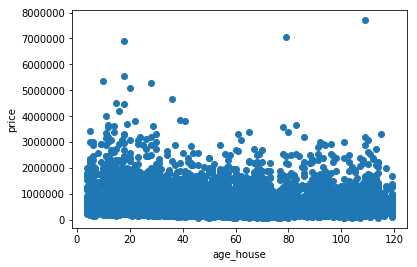

In [147]:
plt.scatter(clean_ohe['age_house'],clean_ohe['price'])
plt.xlabel('age_house')
plt.ylabel('price')

In [148]:
clean_ohe['age_house_log']=np.log(clean_ohe['age_house'])

In [151]:
clean_ohe[['age_house','price_log']].corr()

,age_house,price_log
age_house,1.000000,-0.080583
price_log,-0.080583,1.000000


Text(0, 0.5, 'price_log')

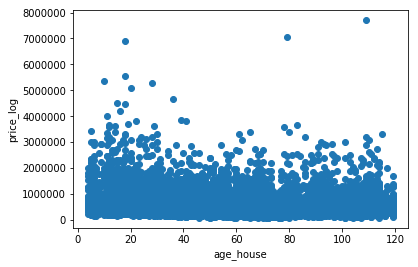

In [152]:
plt.scatter(clean_ohe['age_house'],clean_ohe['price'])
plt.xlabel('age_house')
plt.ylabel('price_log')

In [155]:
clean_ohe[['yr_renovated']].head()
clean_ohe[['yr_renovated','price','price_log']].corr()

,yr_renovated,price,price_log
yr_renovated,1.000000,0.097541,0.122027
price,0.097541,1.000000,0.891745
price_log,0.122027,0.891745,1.000000


In [157]:
clean_ohe['age_renovated']=2019-clean['yr_renovated']

In [158]:
clean_ohe[['age_renovated','price','price_log']].corr()

,age_renovated,price,price_log
age_renovated,1.000000,-0.097541,-0.122027
price,-0.097541,1.000000,0.891745
price_log,-0.122027,0.891745,1.000000


In [159]:
clean_ohe[['view_clean','price','price_log']].corr()

,view_clean,price,price_log
view_clean,1.000000,0.393497,0.344653
price,0.393497,1.000000,0.891745
price_log,0.344653,0.891745,1.000000


Text(0, 0.5, 'price')

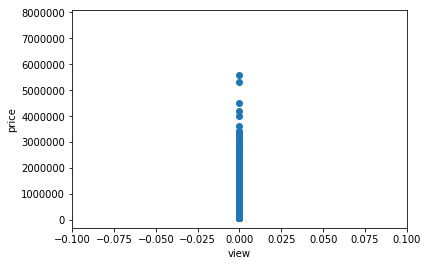

In [166]:
plt.scatter(clean_ohe['view_clean'],clean_ohe['price'])
plt.xlabel('view')
plt.xlim(-0.1,0.1)
plt.ylabel('price')

In [162]:
for i in 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_clean', 'view_clean',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_9